In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv("C:/Users/DELL/Desktop/Internships/Neuronetix/student_dropout.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
df.shape

(4424, 37)

In [5]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

### Check for any null values

In [6]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### Check for any duplicates

In [7]:
duplicates = df[df.duplicated()]
duplicates

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


### Handling Data types

In [8]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

### Checking the balance of the Target to avoid any bias

In [9]:
count_values = df['Target'].value_counts()
count_values

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

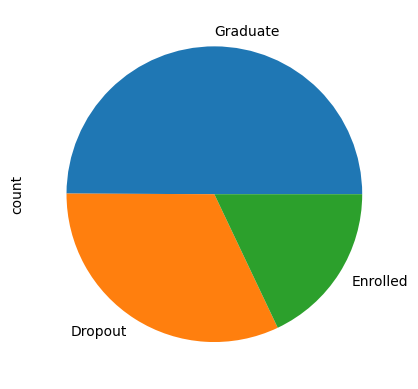

In [10]:
count_values.plot(kind='pie');

<Axes: xlabel='Target', ylabel='count'>

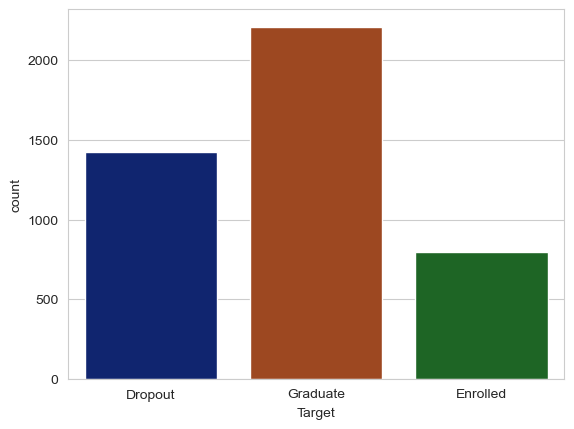

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Target',data=df,palette='dark')

### Encode the categorical features

In [12]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features in the same DataFrame
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])

In [13]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


### Scaling the numerical features

In [14]:
# initialize the MinMaxScaler
MS = MinMaxScaler()
# fit the scaler on the features and transform them
scaled_features = MS.fit_transform(df)
scaled_features

# create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=df.columns)

In [15]:
scaled_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,1.0
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,0.0
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,1.0
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,1.0


### Solving the imabalance by resampling technique

In [16]:
x = df.drop(columns=['Target'])  # Replace 'Target' with the name of your target column
y = df['Target']  # Replace 'Target' with the name of your target column

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

balanced_df = pd.concat([x_resampled, y_resampled], axis=1)

In [17]:
count_values = balanced_df['Target'].value_counts()
count_values

Target
0    2209
2    2209
1    2209
Name: count, dtype: int64

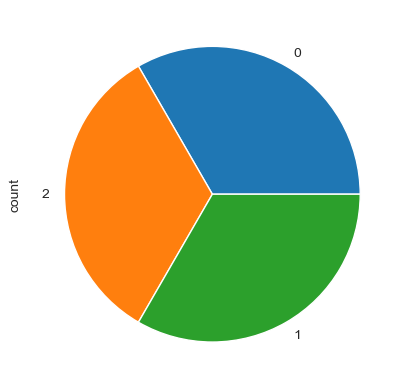

In [18]:
count_values.plot(kind='pie');

### Analyzing the correlation between numerical features and the 'Target' variable

In [19]:
correlation_matrix = balanced_df.corr()

# sort correlations with 'loan_status' in descending order
correlation_with_loan_status = correlation_matrix['Target'].sort_values(ascending=False)

# display correlations with 'loan_status'
print(correlation_with_loan_status)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.622939
Curricular units 2nd sem (grade)                  0.539368
Curricular units 1st sem (approved)               0.537193
Curricular units 1st sem (grade)                  0.461531
Tuition fees up to date                           0.426588
Scholarship holder                                0.333252
Curricular units 2nd sem (enrolled)               0.186894
Curricular units 1st sem (enrolled)               0.166645
Displaced                                         0.163940
Curricular units 2nd sem (evaluations)            0.122303
Admission grade                                   0.116520
Application order                                 0.108668
Previous qualification (grade)                    0.100925
Curricular units 1st sem (evaluations)            0.073920
Daytime/evening attendance\t                      0.071758
Curricular units 2nd sem (credited)               0.0683

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


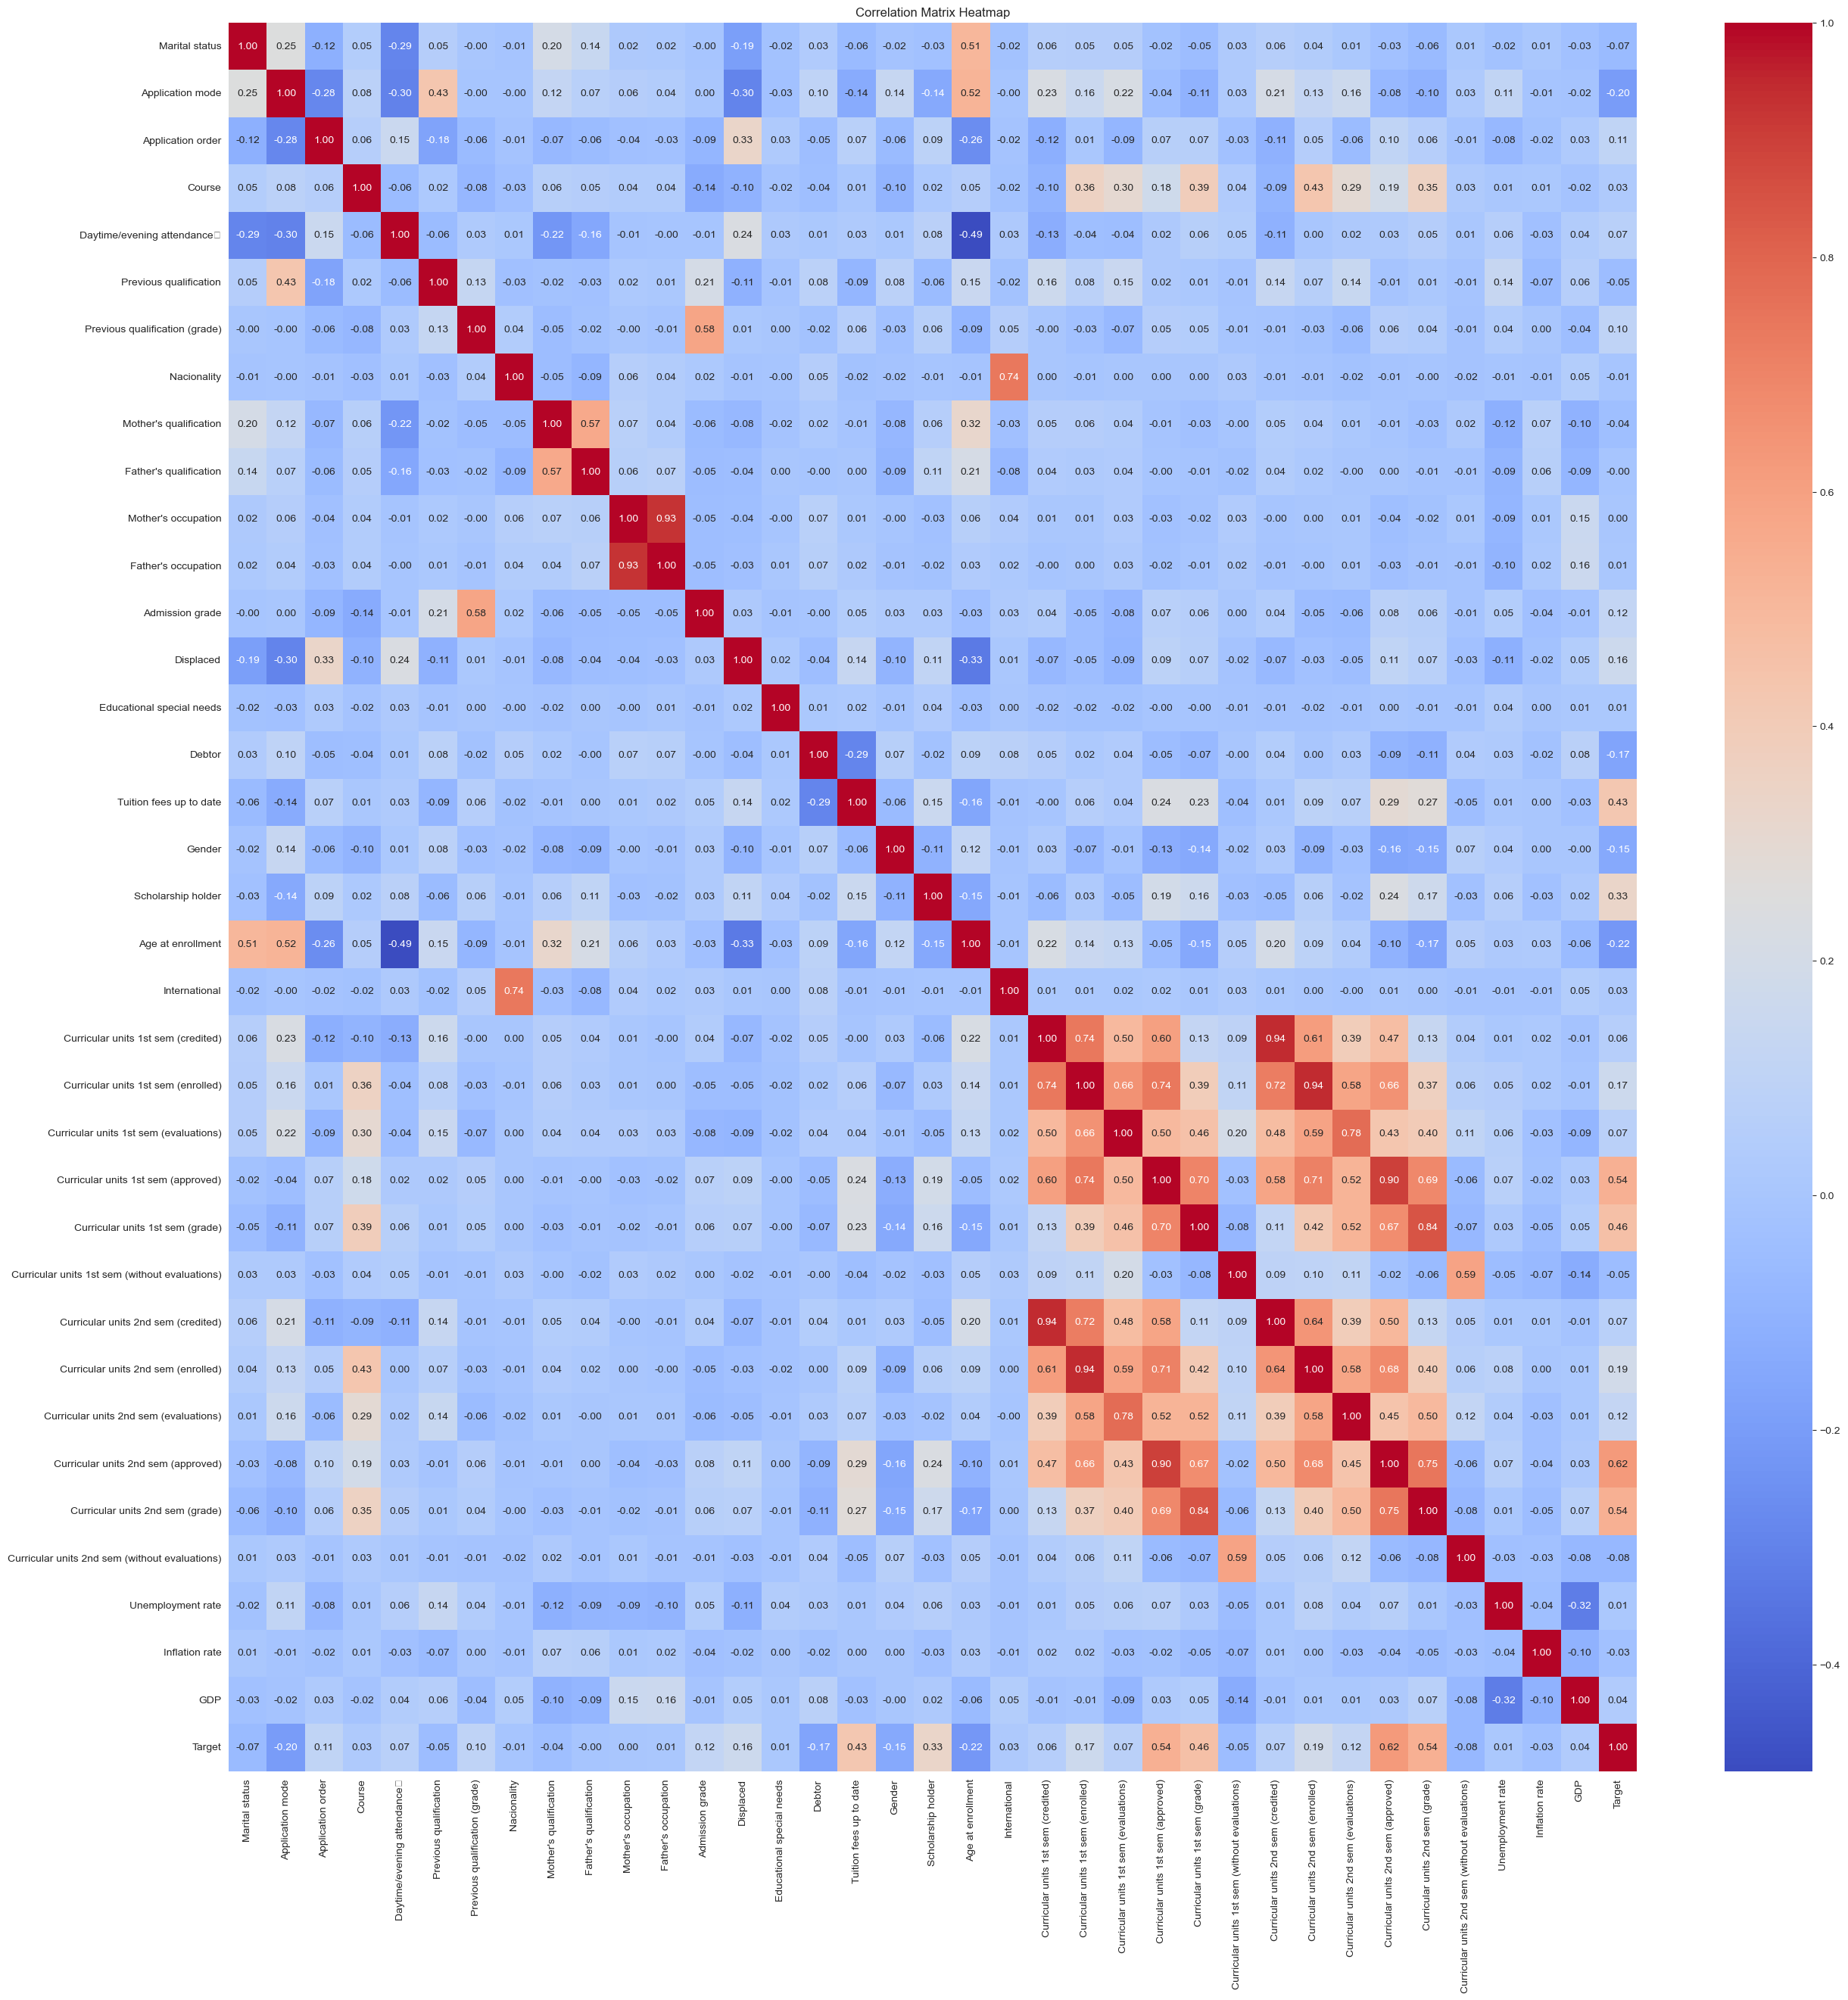

In [20]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Identifying Outliers

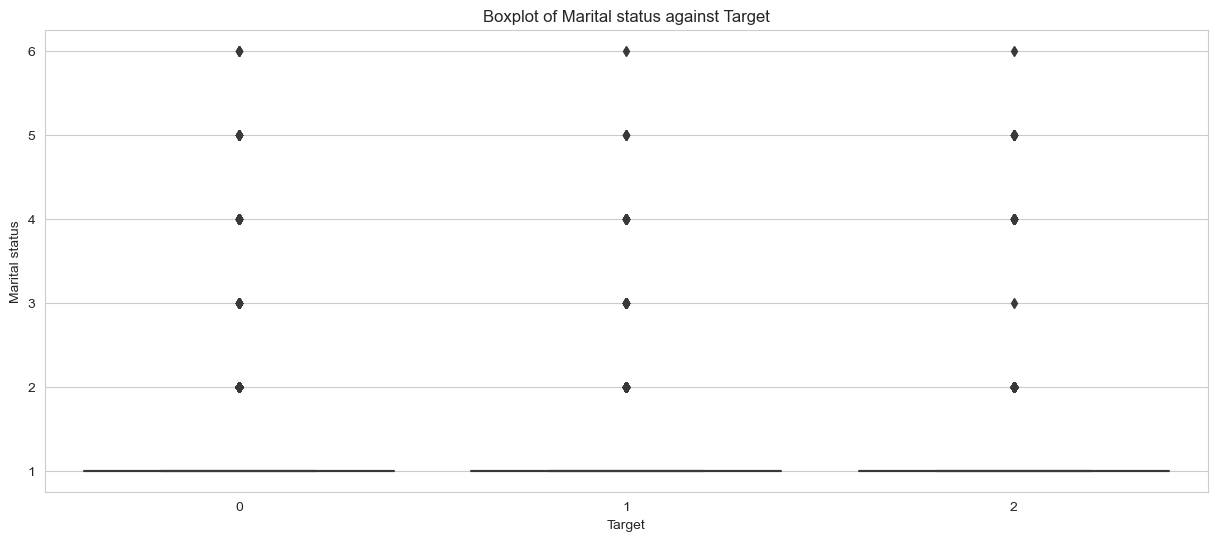

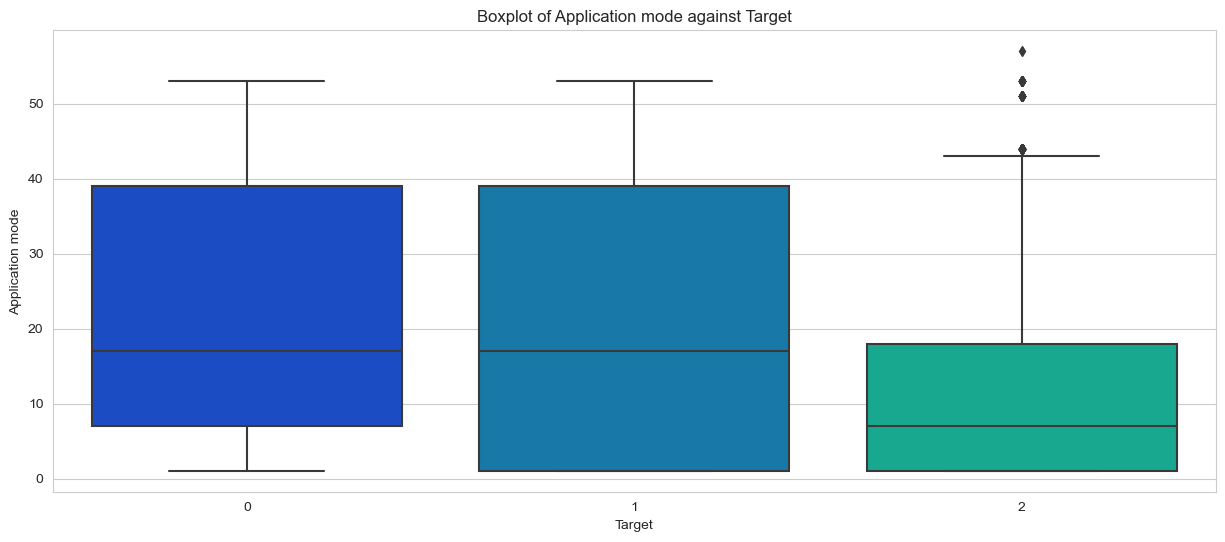

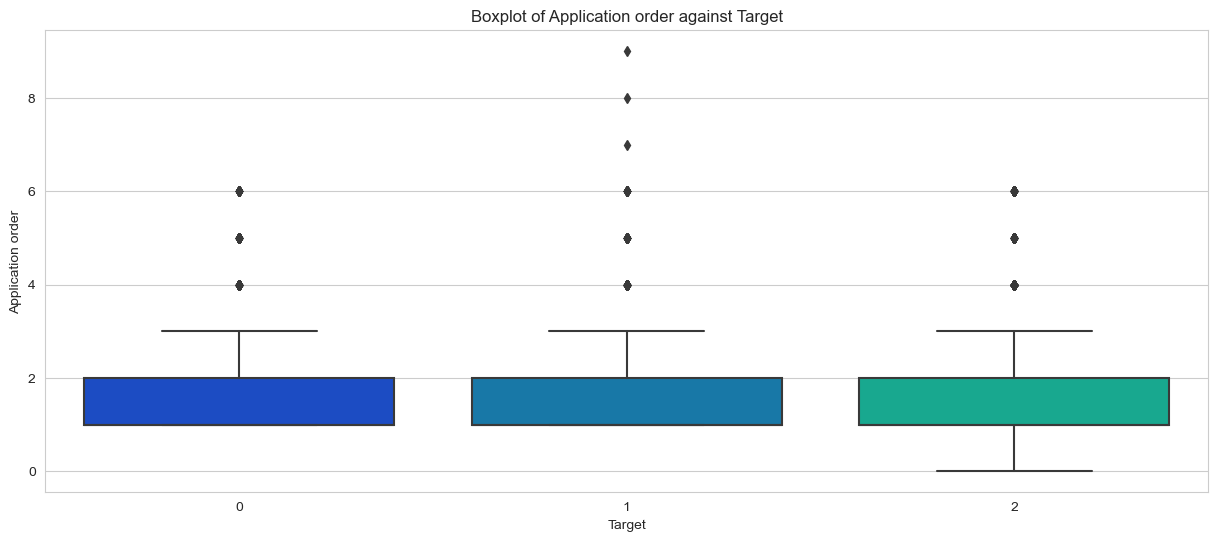

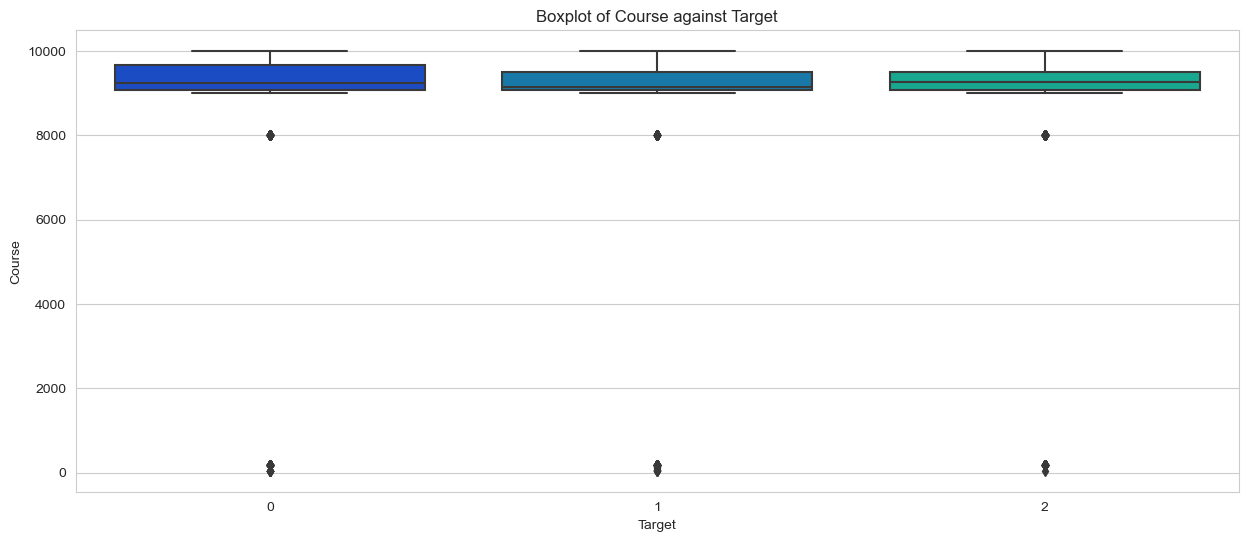

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


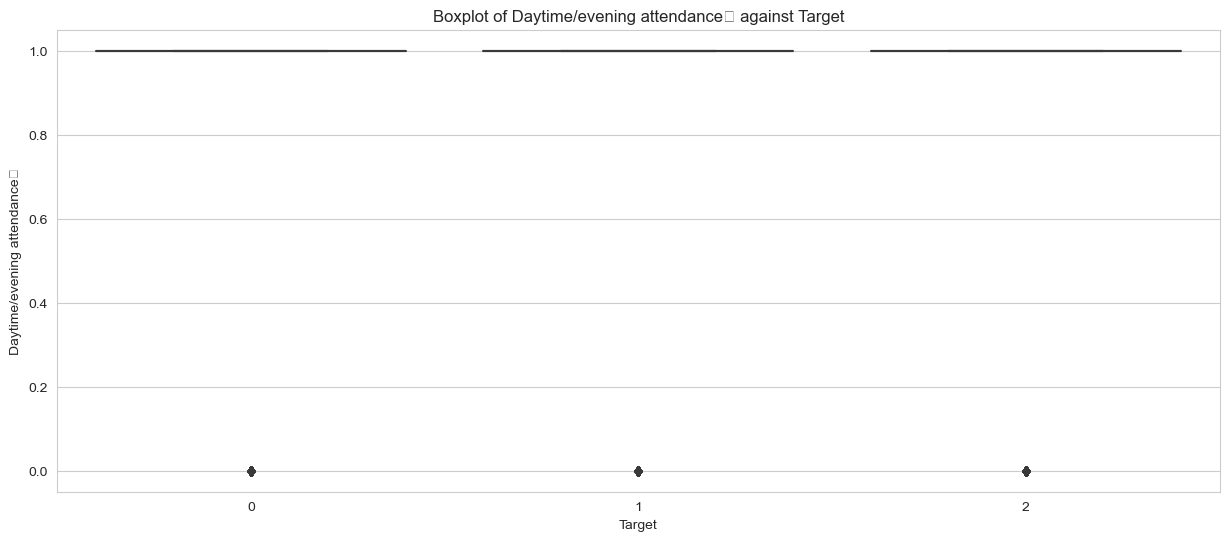

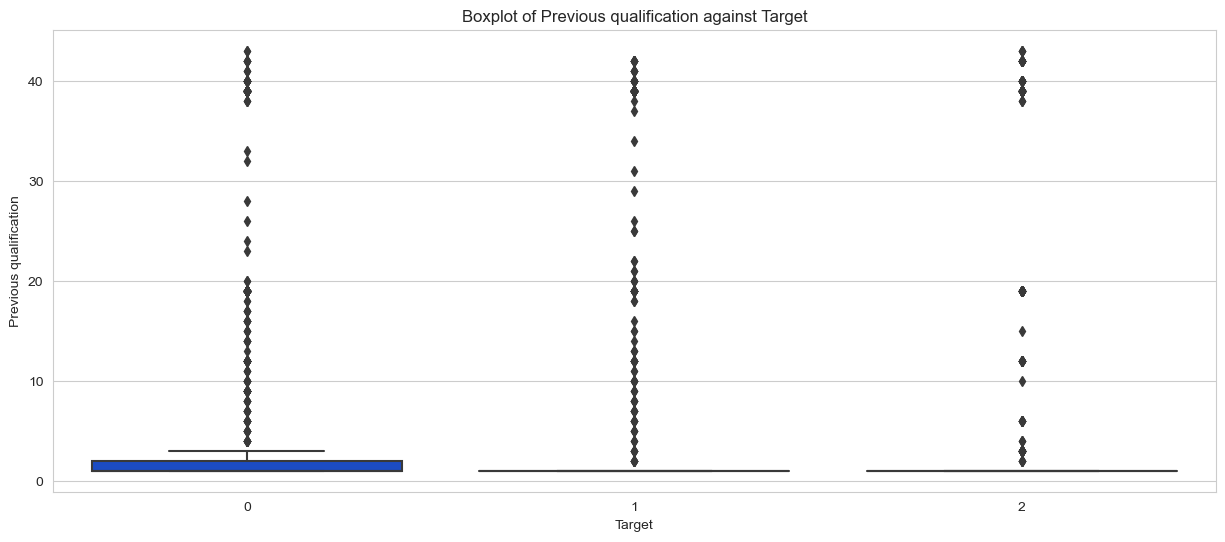

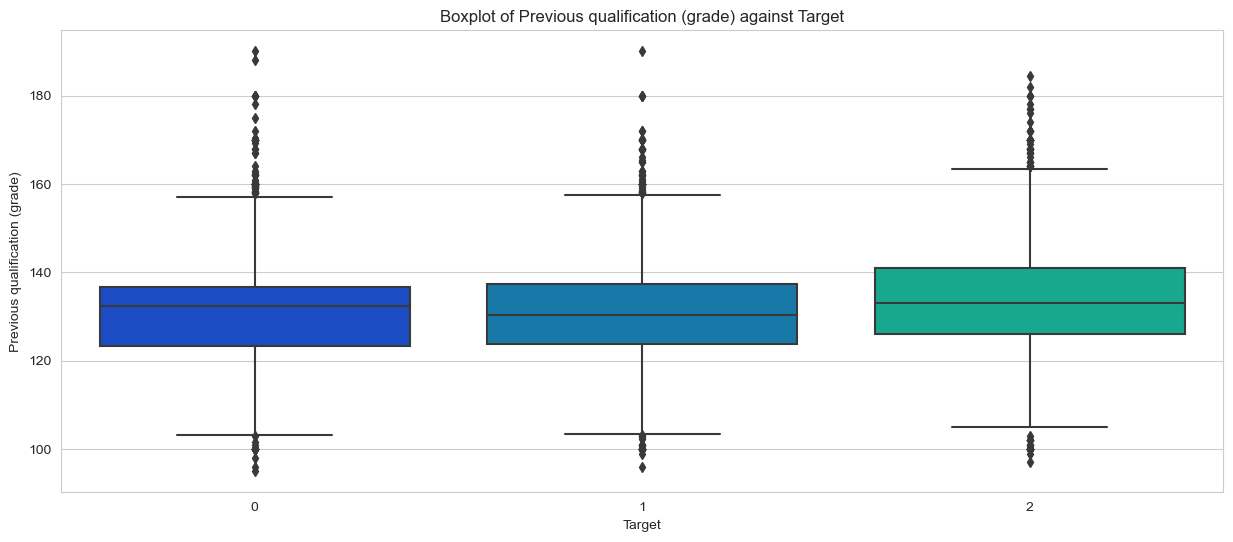

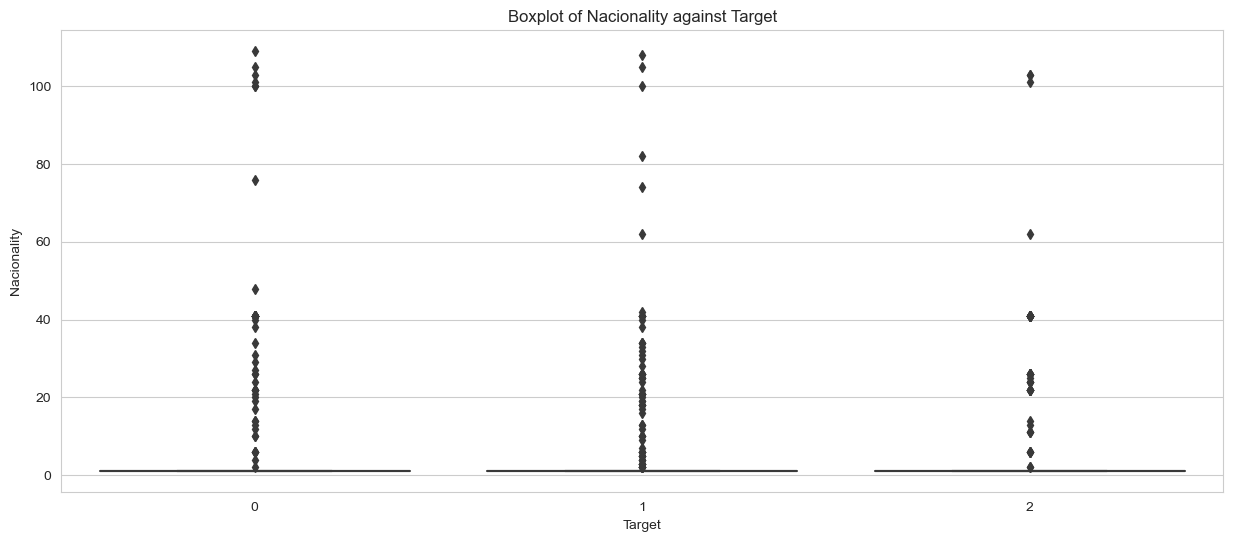

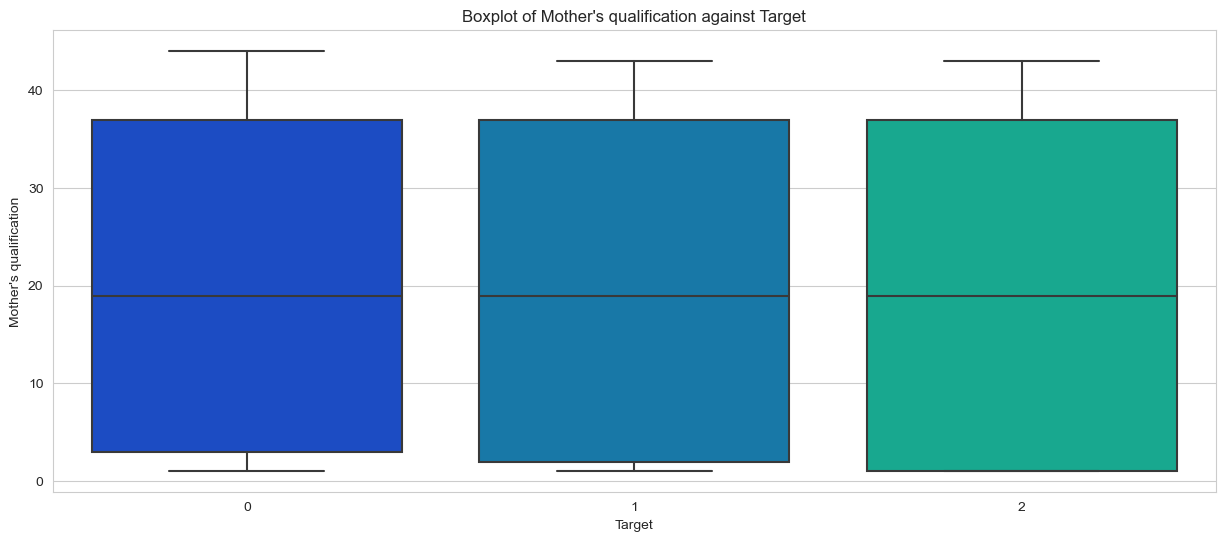

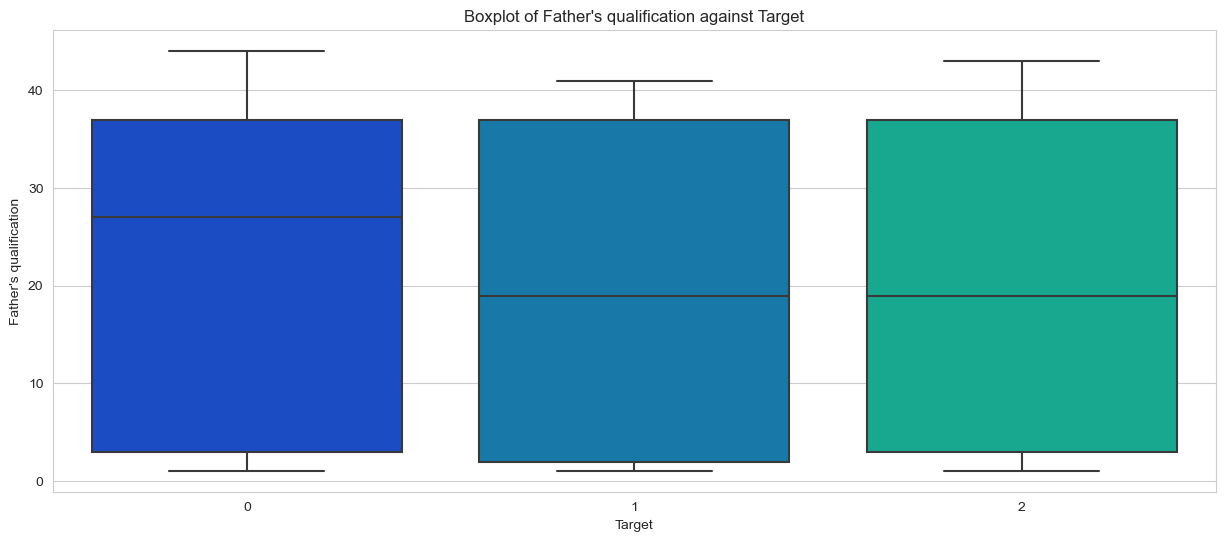

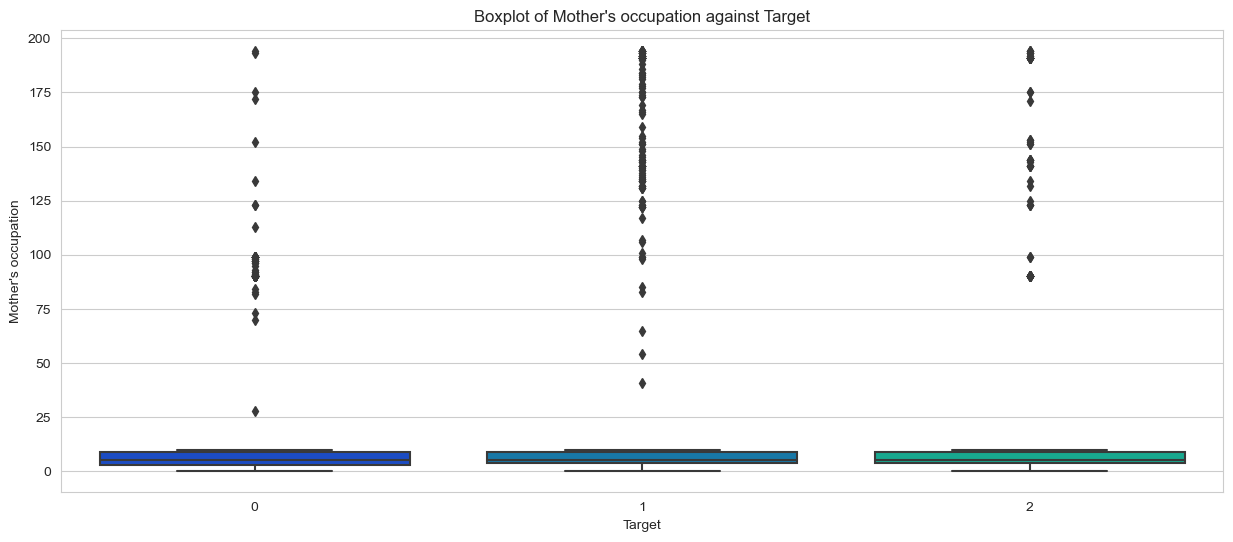

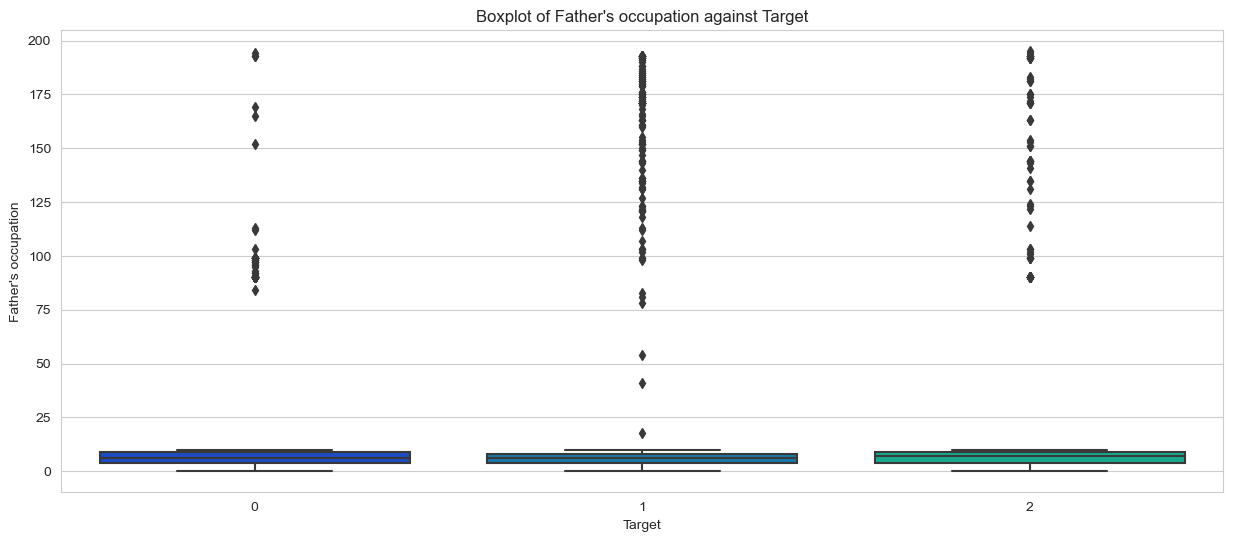

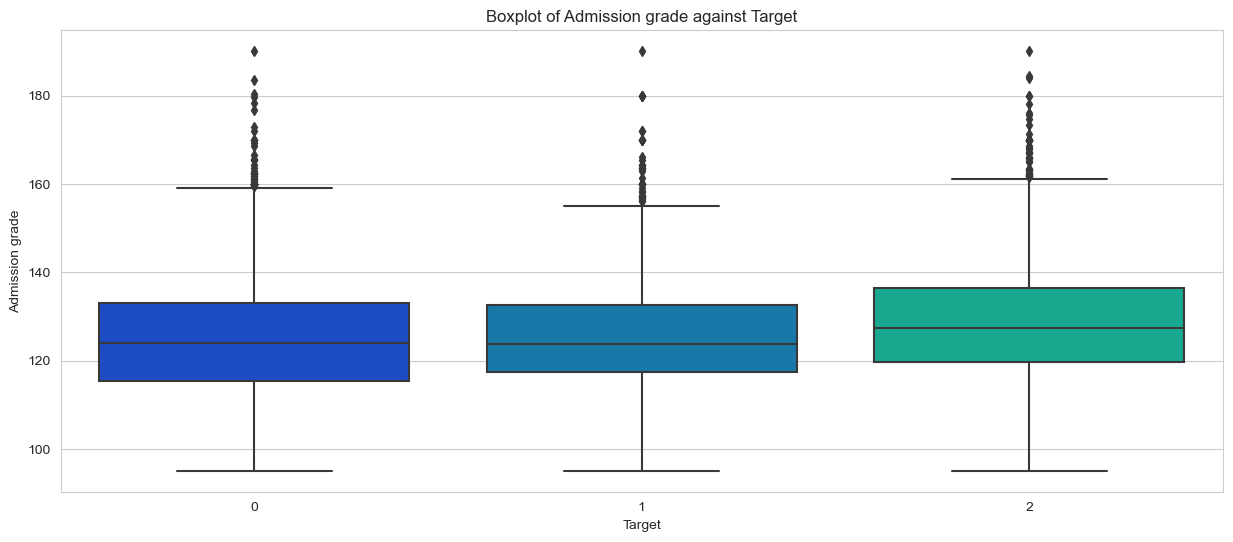

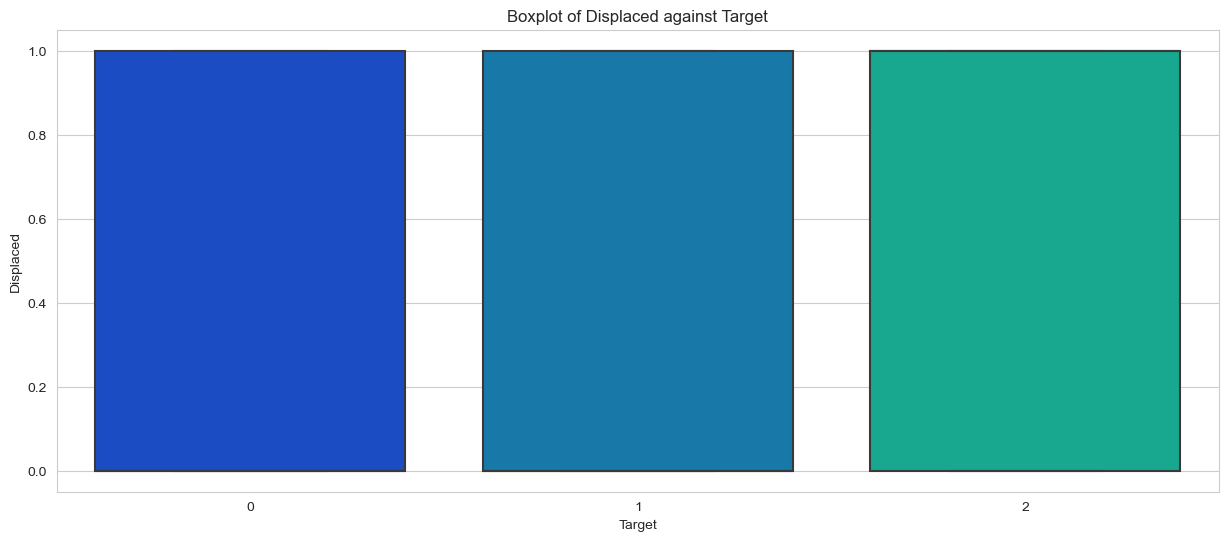

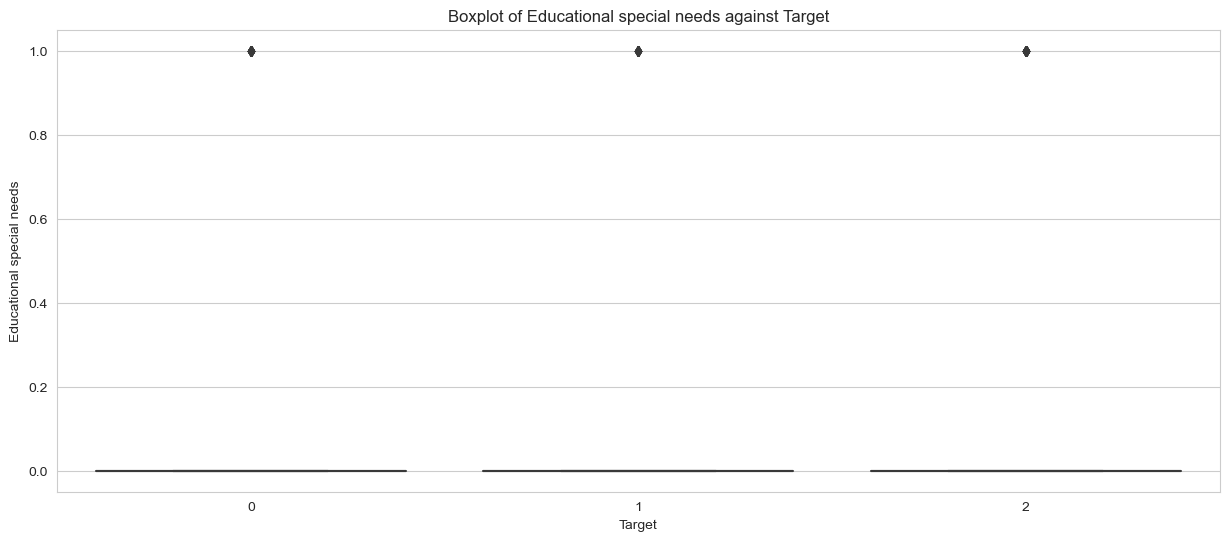

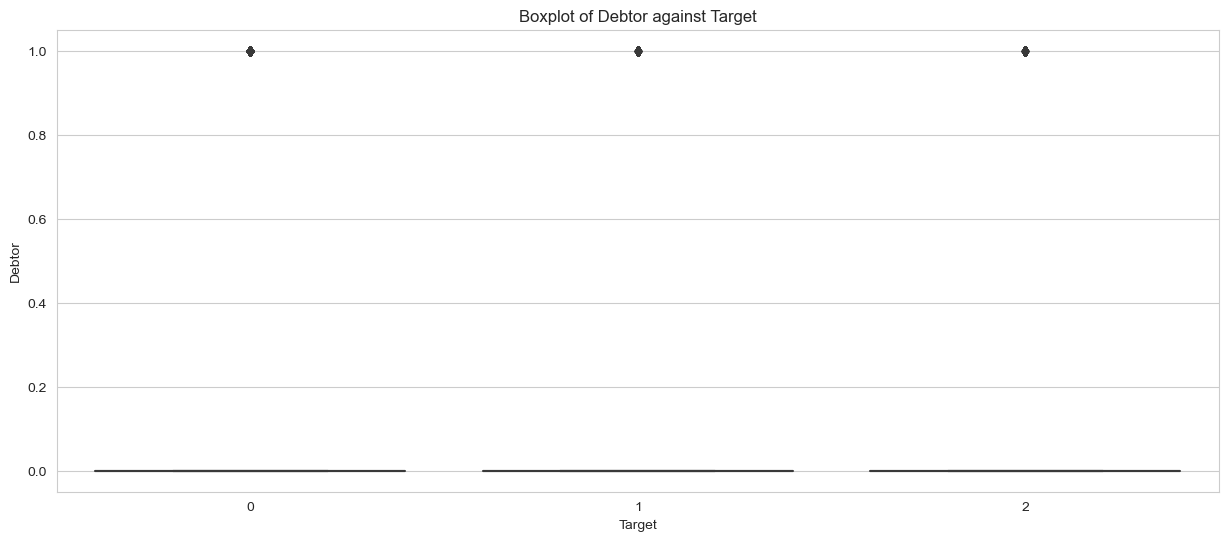

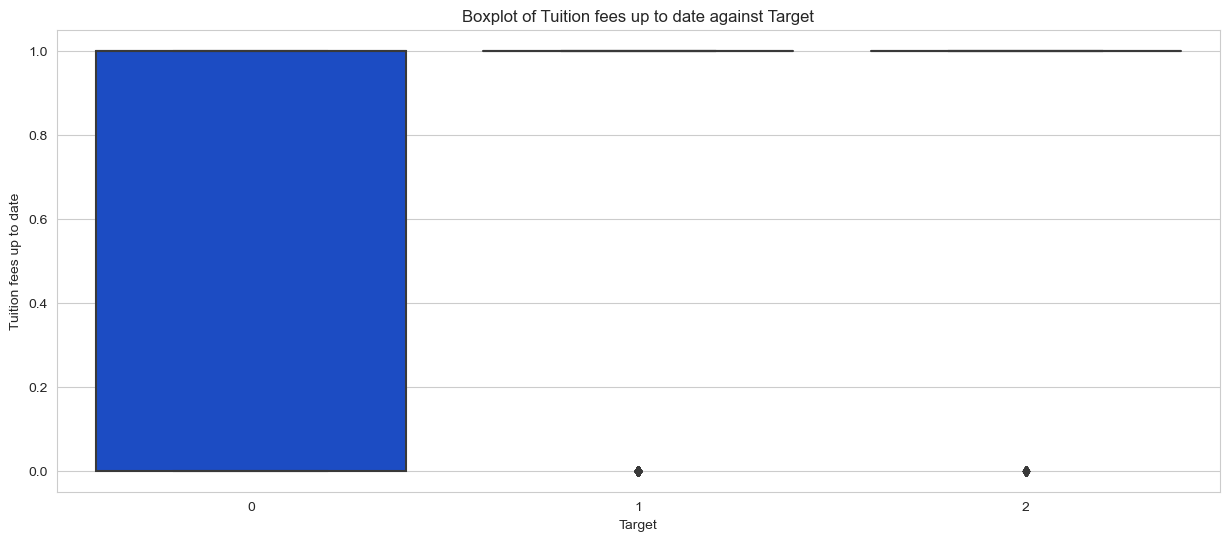

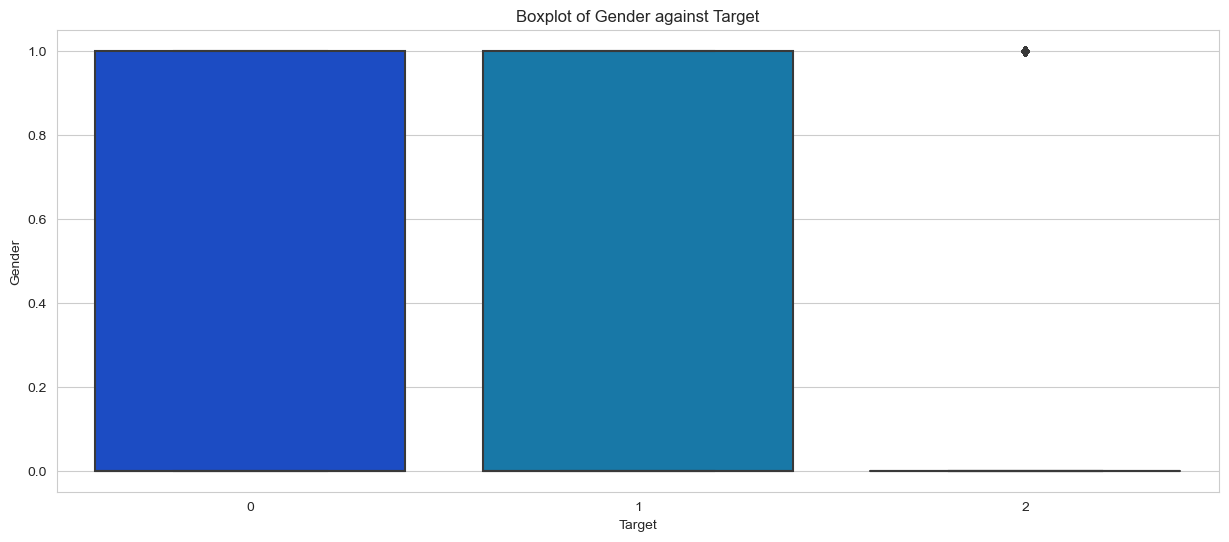

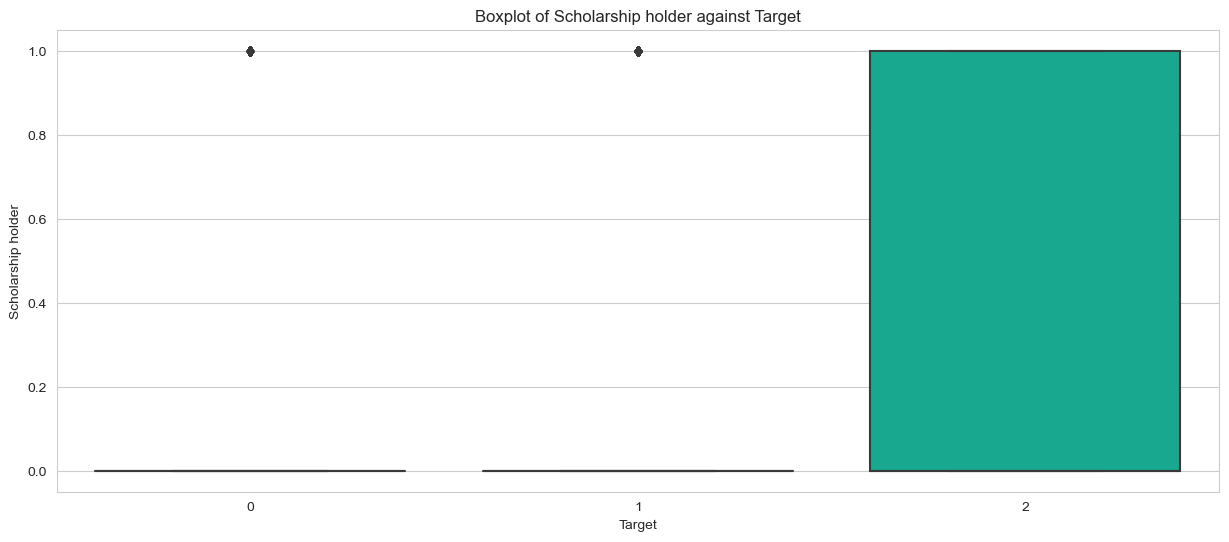

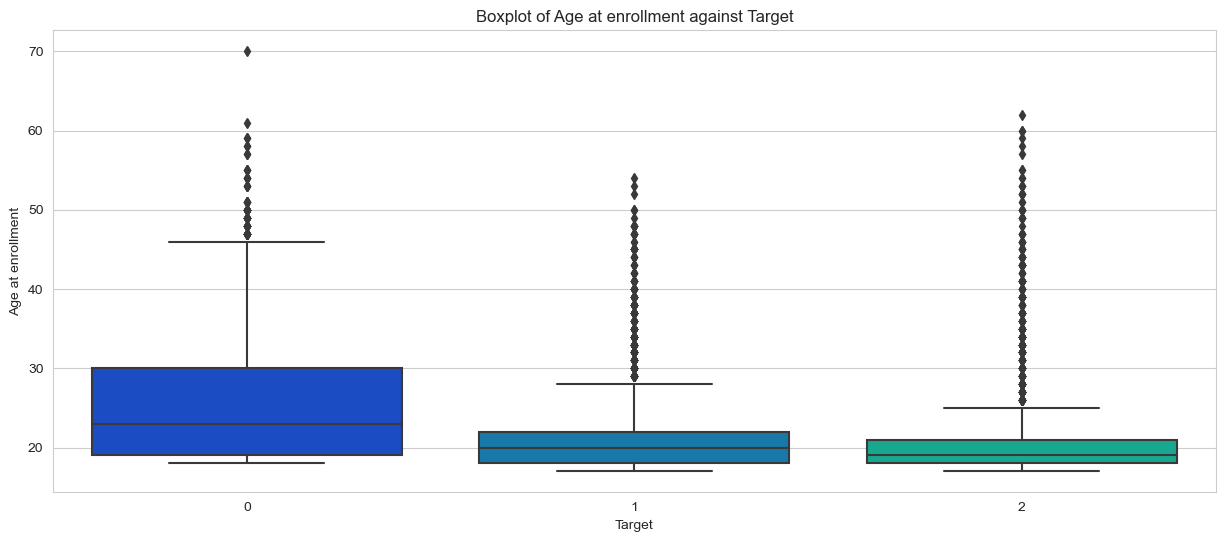

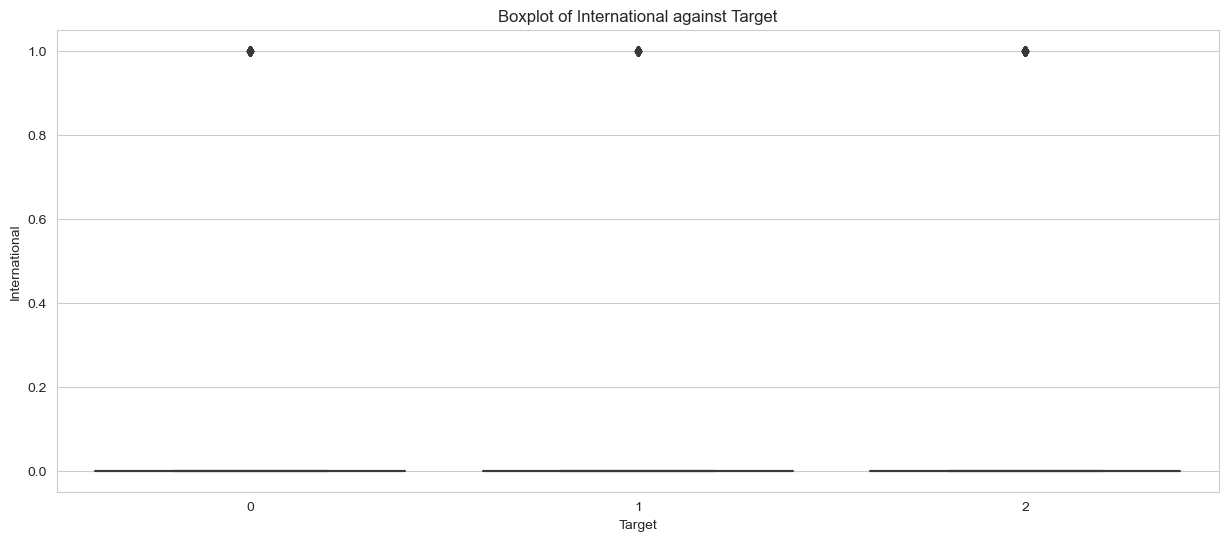

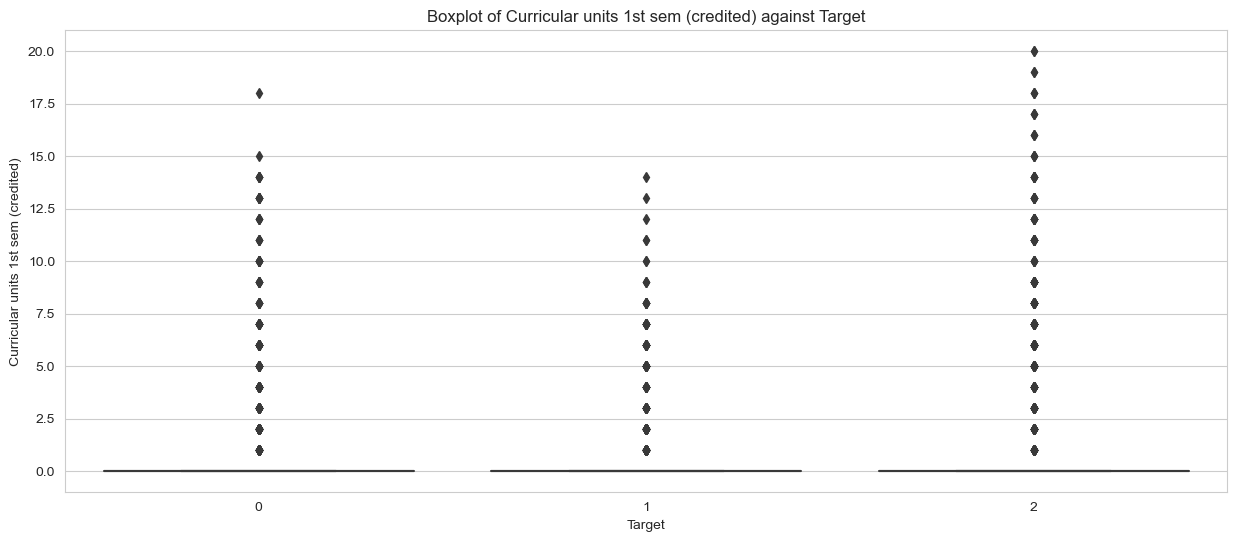

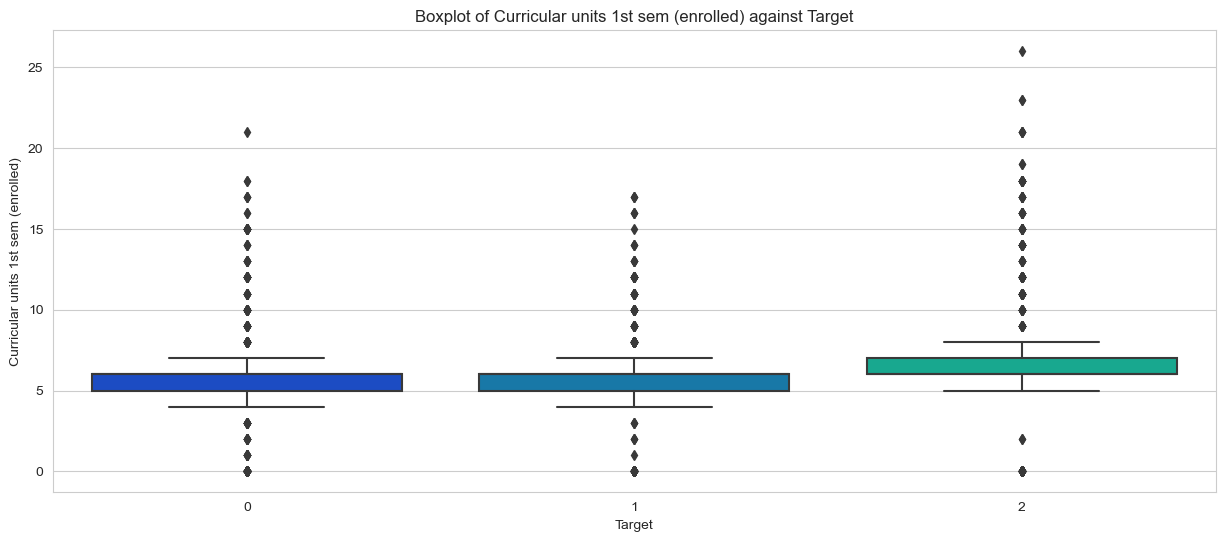

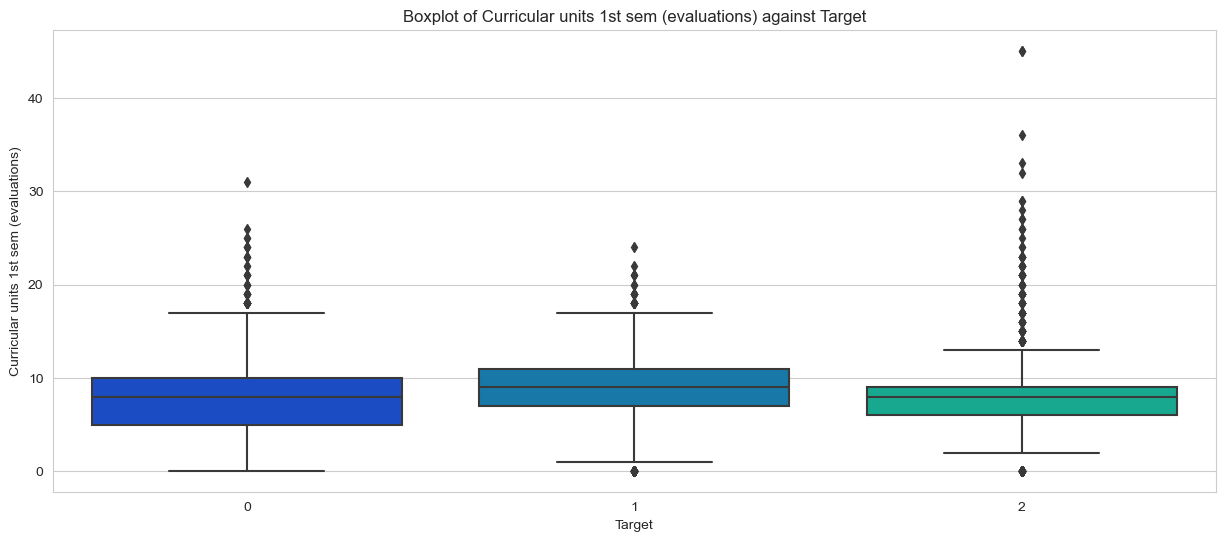

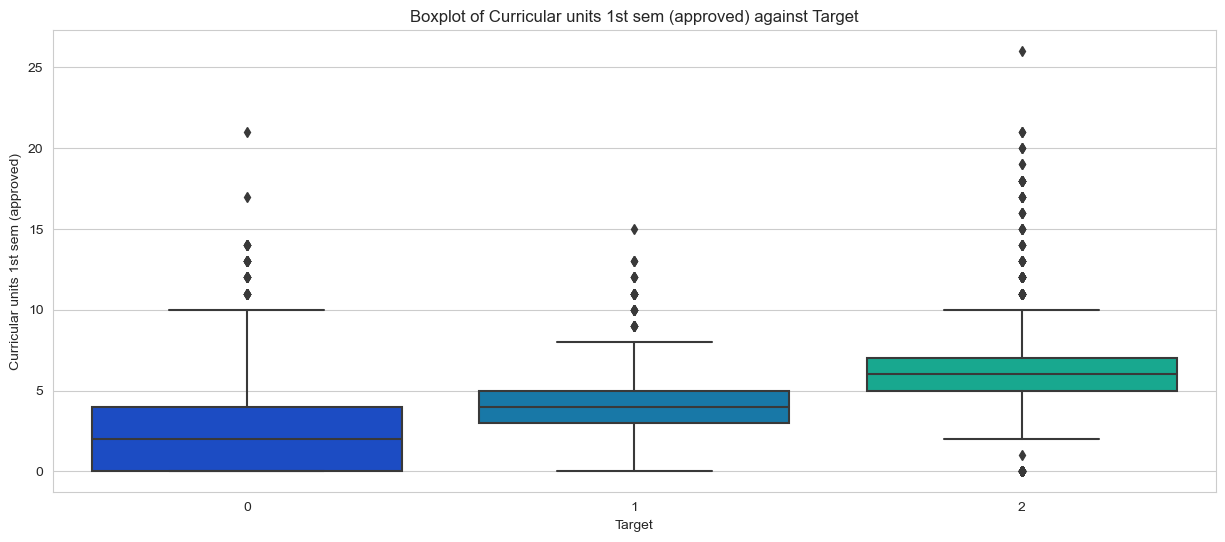

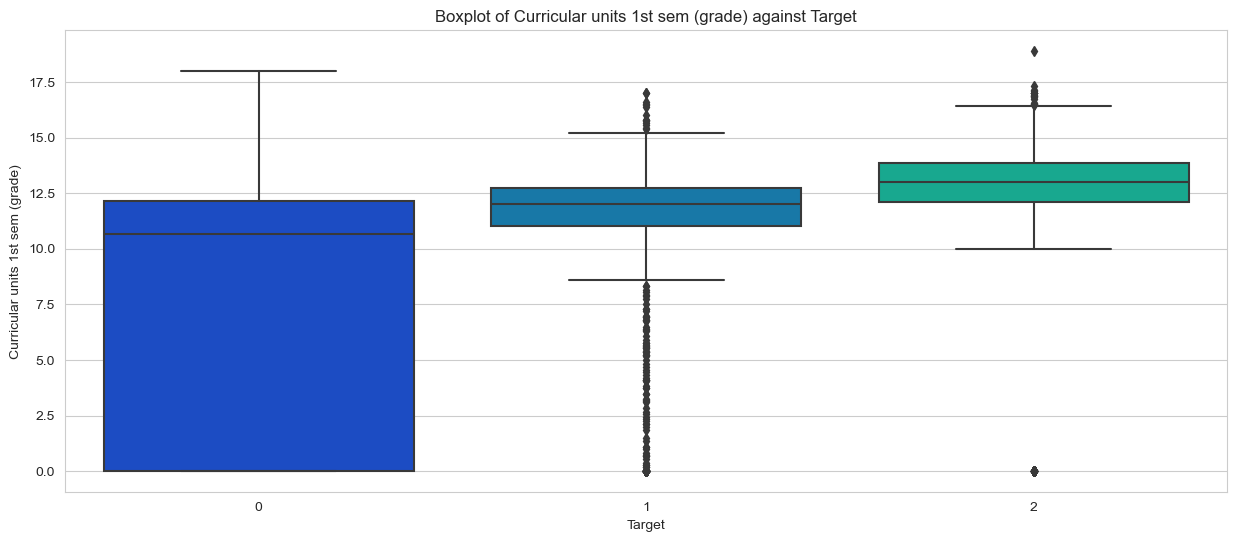

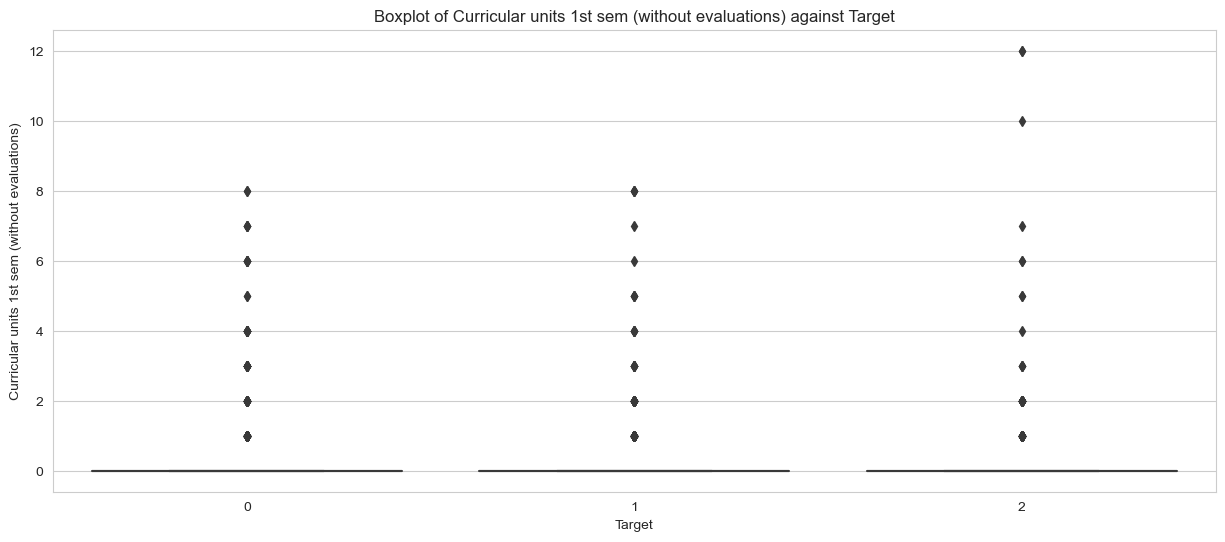

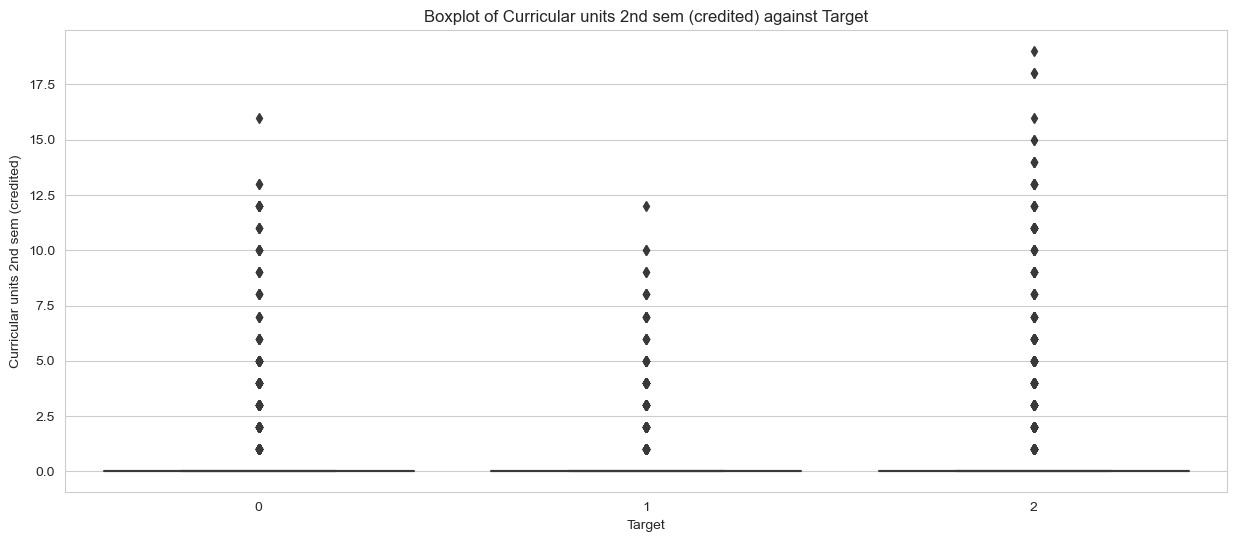

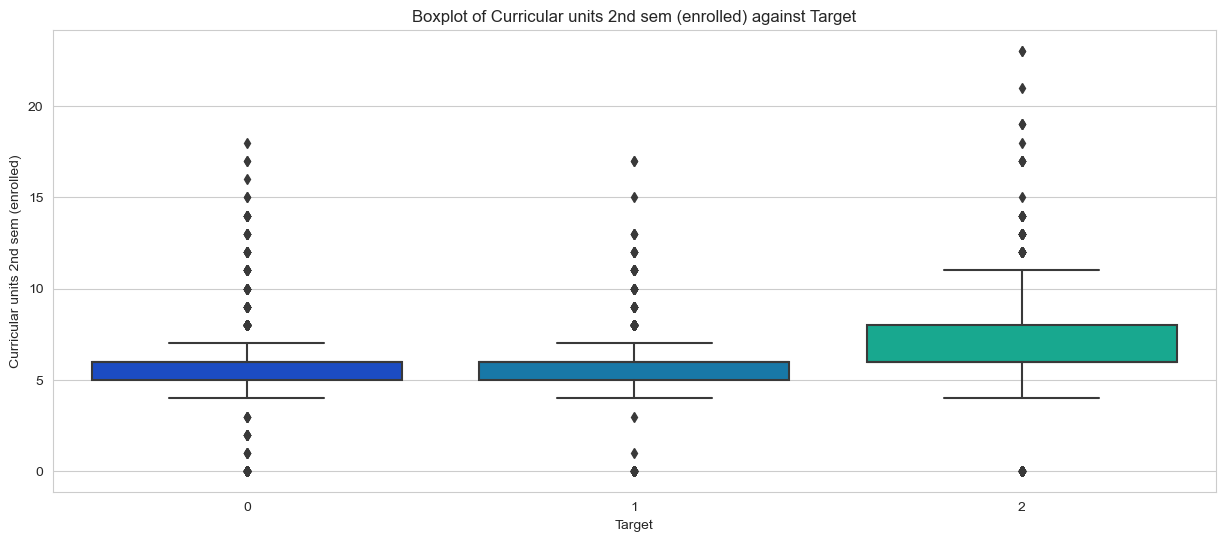

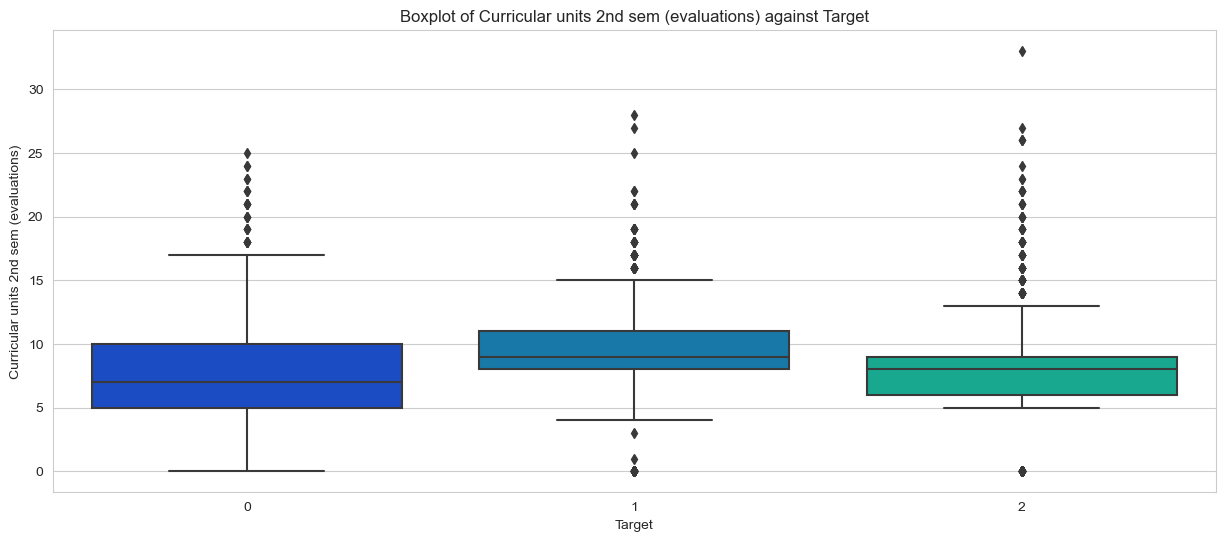

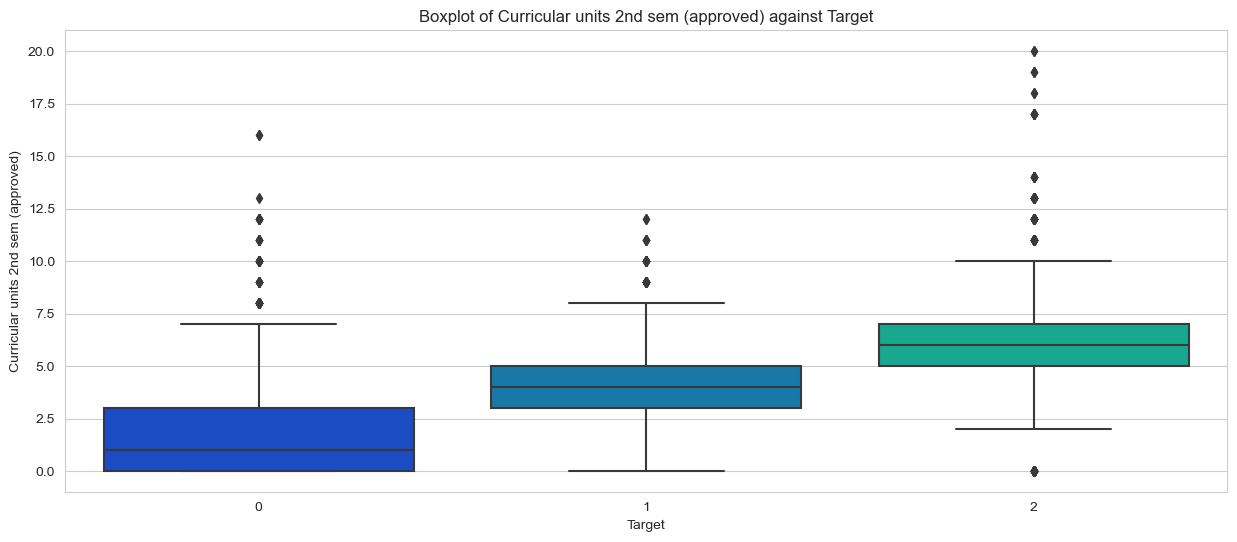

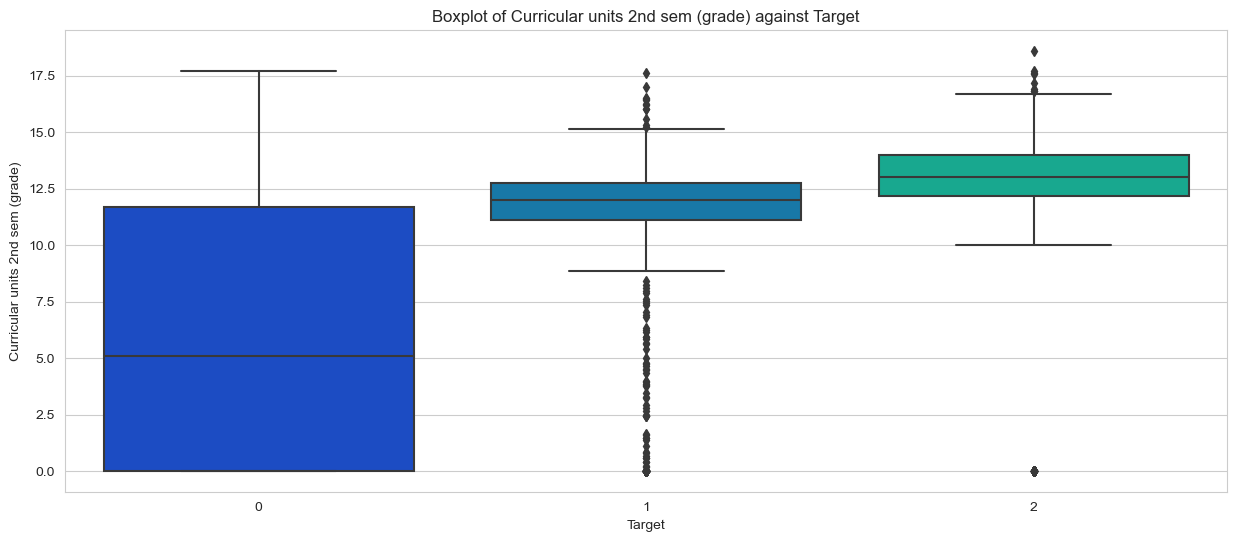

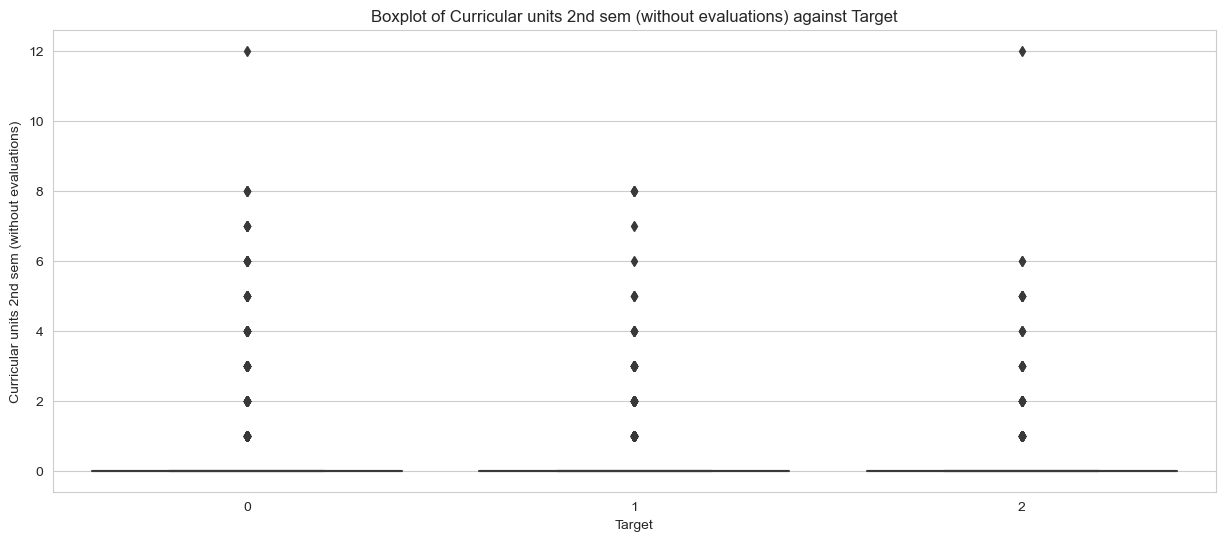

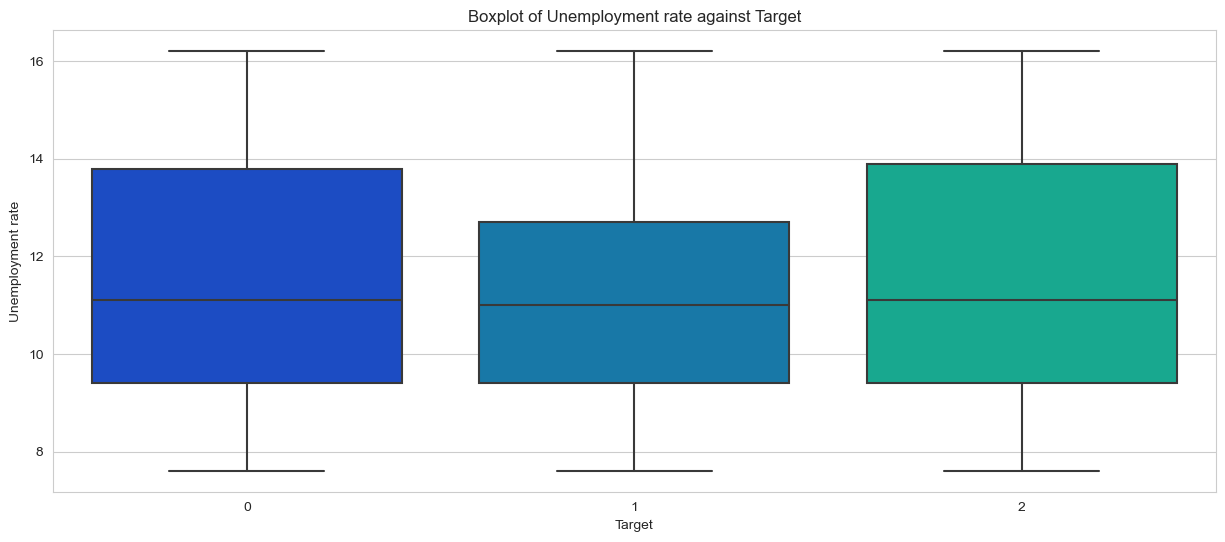

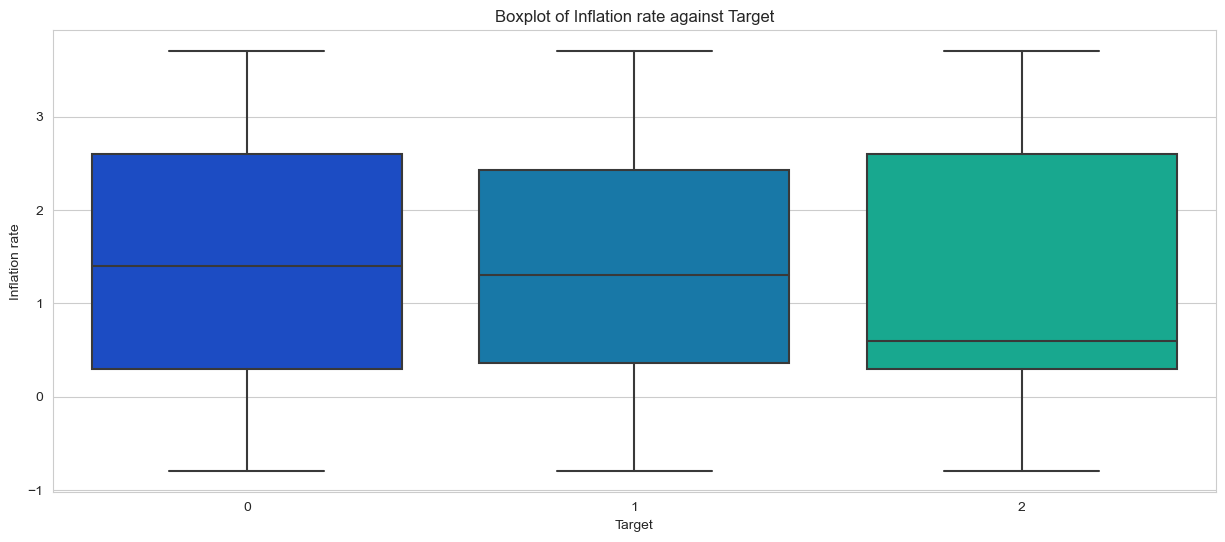

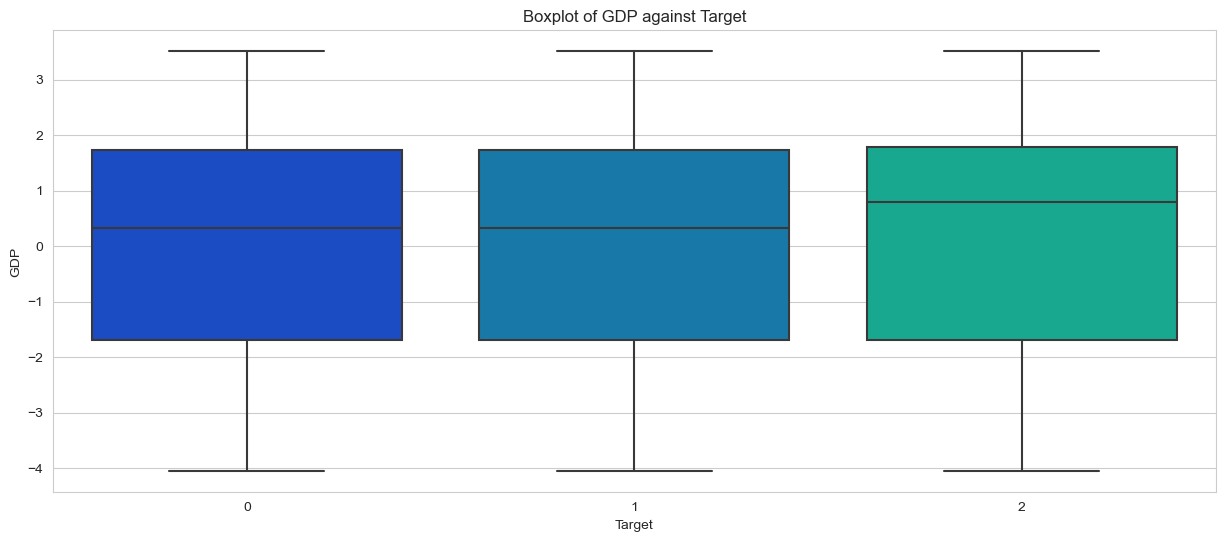

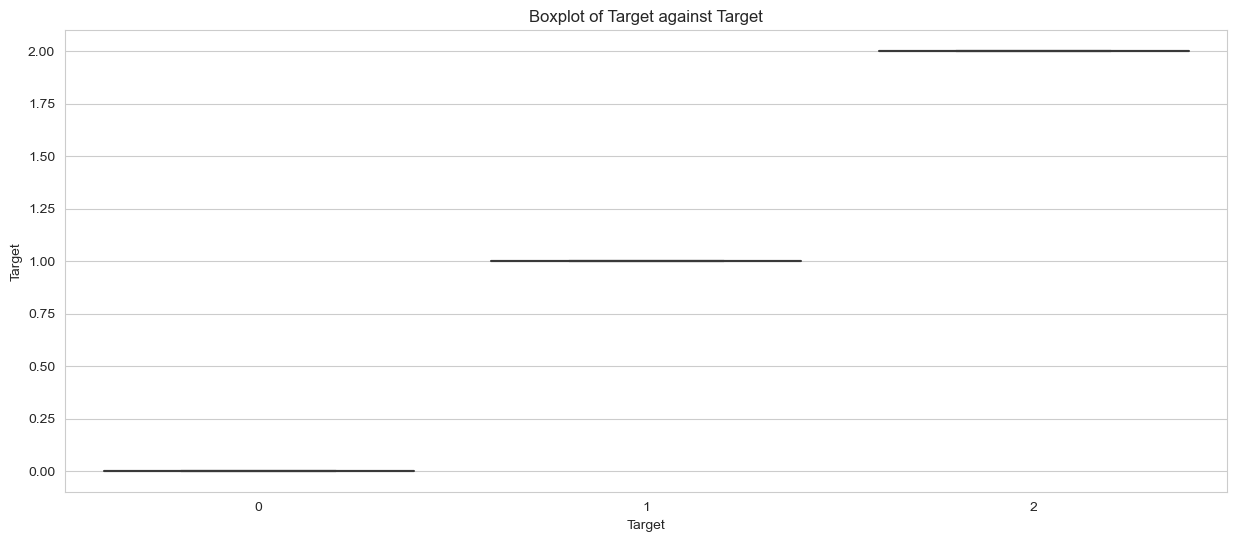

In [21]:
for column in balanced_df:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='Target', y=column , data=balanced_df, palette='winter')
    plt.title(f'Boxplot of {column} against Target')
    plt.show()

### Removing Outliers

In [22]:
def remove_outliers(balanced_df, columns, threshold):
    cleaned_data = balanced_df.copy()
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)
        Q3 = cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

In [23]:
def iterative_outlier_removal(balanced_df, columns, threshold=4, max_iterations=2):
    outliers_before_removal = {}
    outliers_after_removal = {}
    cleaned_data = balanced_df.copy()  # Copy of the original dataset
    for i in range(max_iterations):
        outliers_before_removal[i] = {}
        for column in columns:
            Q1 = cleaned_data[column].quantile(0.25)
            Q3 = cleaned_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers = cleaned_data[(cleaned_data[column] < lower_bound) | (cleaned_data[column] > upper_bound)]
            outliers_before_removal[i][column] = outliers
        cleaned_data = remove_outliers(cleaned_data, columns, threshold)
        outliers_after_removal[i] = {}
        for column in columns:
            Q1 = cleaned_data[column].quantile(0.25)
            Q3 = cleaned_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers = cleaned_data[(cleaned_data[column] < lower_bound) | (cleaned_data[column] > upper_bound)]
            outliers_after_removal[i][column] = outliers
        # Check if the dataset size has stabilized (no change from previous iteration)
        if i > 0 and len(cleaned_data) == len(prev_cleaned_data):
            break
        prev_cleaned_data = cleaned_data.copy() 
    return cleaned_data, outliers_before_removal, outliers_after_removal

columns = balanced_df.columns

cleaned_data, outliers_before, outliers_after = iterative_outlier_removal(balanced_df, columns, threshold=4, max_iterations=2)

In [24]:
for iteration, outliers_dict in outliers_before.items():
    print(f"Iteration {iteration + 1}: Outliers before removal")
    for column, outliers in outliers_dict.items():
        print(f"Column '{column}' has {len(outliers)} outliers before removal.")
    print("---------------------------------------------")

for iteration, outliers_dict in outliers_after.items():
    print(f"Iteration {iteration + 1}: Outliers after removal")
    for column, outliers in outliers_dict.items():
        print(f"Column '{column}' has {len(outliers)} outliers after removal.")
    print("---------------------------------------------")

Iteration 1: Outliers before removal
Column 'Marital status' has 673 outliers before removal.
Column 'Application mode' has 0 outliers before removal.
Column 'Application order' has 3 outliers before removal.
Column 'Course' has 343 outliers before removal.
Column 'Daytime/evening attendance	' has 736 outliers before removal.
Column 'Previous qualification' has 1086 outliers before removal.
Column 'Previous qualification (grade)' has 0 outliers before removal.
Column 'Nacionality' has 185 outliers before removal.
Column 'Mother's qualification' has 0 outliers before removal.
Column 'Father's qualification' has 0 outliers before removal.
Column 'Mother's occupation' has 299 outliers before removal.
Column 'Father's occupation' has 287 outliers before removal.
Column 'Admission grade' has 0 outliers before removal.
Column 'Displaced' has 0 outliers before removal.
Column 'Educational special needs' has 51 outliers before removal.
Column 'Debtor' has 565 outliers before removal.
Column 'T

In [25]:
cleaned_data.shape

(1458, 37)

### Splitting the dataset

In [26]:
# Split the data

x = cleaned_data.drop(['Target'], axis=1)
y = cleaned_data.Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43) 

print('Train size:', len(x_train))
print('Test size:', len(x_test))

Train size: 1166
Test size: 292


### Decision Tree

In [27]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train) 

dt_pred = dt.predict(x_test)

dt_accuracy = accuracy_score(dt_pred, y_test)
print('Decision Tree Accuracy:', dt_accuracy)

Decision Tree Accuracy: 0.7191780821917808


### Random Forest

In [28]:
rf = RandomForestClassifier(n_estimators=200)  
rf.fit(x_train, y_train) 

rf_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(rf_pred, y_test)
print('Random Forest Accuracy:', rf_accuracy)

Random Forest Accuracy: 0.8424657534246576


### SVM

In [29]:
svc = SVC(kernel='linear')  
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

svc_accuracy = accuracy_score(svc_pred, y_test)
print('SVC Accuracy:', svc_accuracy)

SVC Accuracy: 0.7876712328767124


### Models

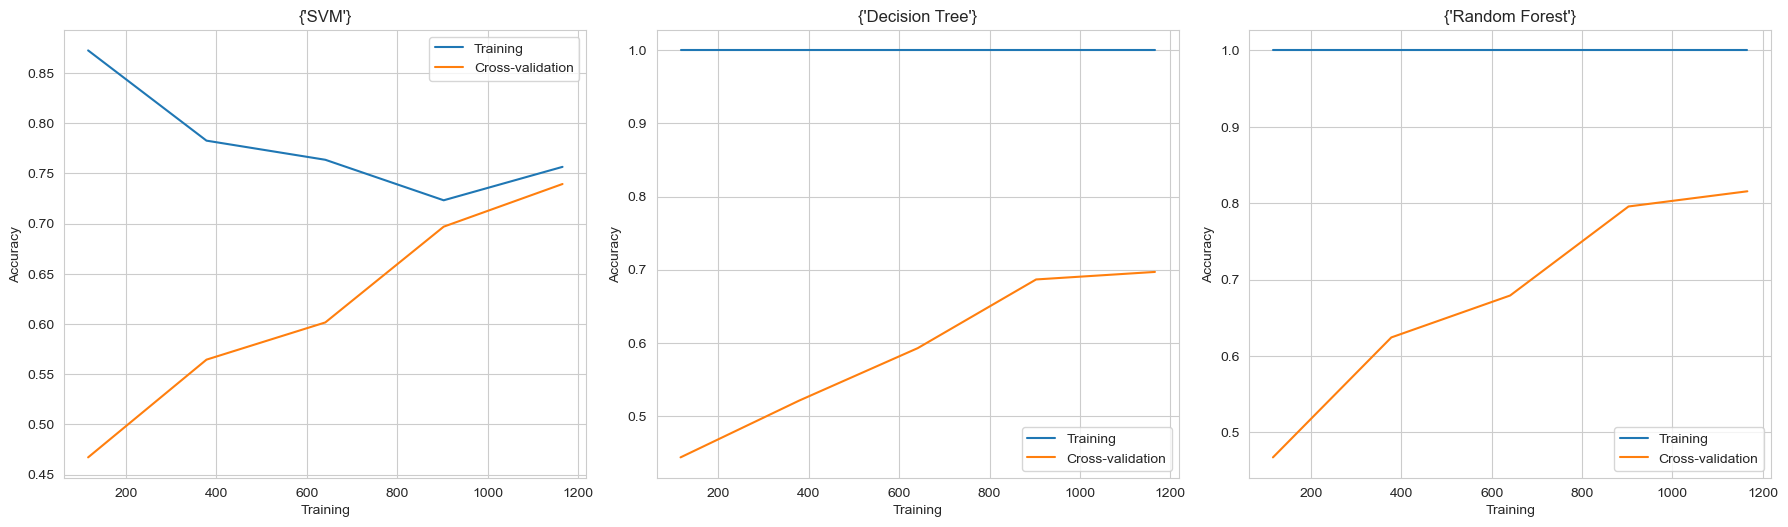

In [30]:
my_model = [svc, dt, rf]
models = ['SVM', 'Decision Tree', 'Random Forest']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, model in enumerate(my_model):
    train_sizes, train_scores, test_scores = learning_curve(model, x, y, n_jobs=-1)
    
    axes[i].plot(train_sizes, train_scores.mean(axis=1), label='Training')
    axes[i].plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation')
    axes[i].set_xlabel('Training')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_title({models[i]})
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()